In [2]:
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal
import matplotlib.pyplot as plt

# General Settings

## Base year
- By setting the *base year* in the config.yaml, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. generate_specific_consumption_per_branch() because it makes use of particular publications from these years

# Spatial Functions

### Function disagg_CTS()
- returns a dataframe with absolute gas or electricity consumption per branch and district for the sector CTS in MWh per year
- uses files "../data_in/specific_`source`_consumption.csv", with `source` being in ['power', 'gas'], if file does not exist, function generate_specific_consumption_per_branch_and_district() is called

In [4]:
df_abs_econ_dis_branch_CTS = spatial.disagg_CTS(source = 'power') # argument can be set to 'gas' as well
df_abs_econ_dis_branch_CTS.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,278.613484,1243.044776,1928.862583,3664.838908,31504.755524,14012.017687,25482.417904,18752.830669,42542.135861,14745.082858,...,24046.486870,14151.605925,9935.120169,18474.217185,3879.156973,14980.832729,27882.780229,29425.870296,20107.112173,15880.968601
2,0.000000,49.822825,54.430913,0.000000,18.696504,971.732113,8.064970,84.670308,67.871916,435.447300,...,19.956501,290.439081,275.892430,107.256266,1264.816441,229.819408,24.705839,532.213367,199.857928,0.000000
3,0.000000,0.000000,1081.912997,0.000000,2615.861858,104.510318,4613.429094,1046.344743,356.329406,713.416870,...,0.000000,36.658340,93.914547,0.000000,0.000000,441.283998,147.408823,332.927873,0.000000,0.000000
36,0.000000,16917.988254,0.000000,0.000000,0.000000,8190.370493,3498.114316,5837.385789,10491.334771,0.000000,...,8655.968414,2872.877928,7359.990418,4905.756829,40296.263099,23418.305060,2620.079185,6435.012265,15715.617801,14532.732944
37,13045.394931,1593.907460,0.000000,8210.603187,2254.487844,19668.618823,8526.395617,2432.355116,11636.024520,3606.288363,...,3606.818157,0.000000,3066.802673,6000.056175,2870.711796,2684.235657,1489.556858,2681.377515,0.000000,4722.459548


### Function disagg_industry()
- Returns a dataframe with absolute gas/electricity consumption per branch and districtfor the industrial sector in MWh per year
- uses files "../data_in/specific_`source`_consumption.csv", with `source` being in ['power', 'gas'], if file does not exist, function generate_specific_consumption_per_branch_and_district() is called

In [5]:
df_abs_econ_dis_branch_industry = spatial.disagg_industry(source = 'power') # argument can be set to 'gas' as well
df_abs_econ_dis_branch_industry.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,40775.665514,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.0,0.000000,64028.621347,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,799.468351,0.0,884.541758,5589.280455,252.606841,277.299339,1739.770532,1303.873588,310.712952,...,1004.861678,170.607931,1111.383146,560.19884,2036.655707,4170.059958,116.866387,2114.613266,295.400193,3738.518695
9,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,6160.882210,0.000000,0.000000,436.426769,1702.012462


### Function "generate_specific_consumption_per_branch_and_district()"
- Returns specific power and gas consumption per branch and district.
- saves result in "../data_in/specific_power_consumption.csv" and "../data_in/specific_gas_consumption.csv"
- Takes number of iterations as arguments, 8 is recommended. Look at docstring for clarification.

In [6]:
df_spec_econ_district, df_spec_gcon_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [8]:
df_spec_econ_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,...,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806
2,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,...,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879
3,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,...,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125
5,167.180743,238.494784,138.232790,144.713079,1001.644188,155.656725,400.074771,252.001533,235.649094,400.074771,...,400.074771,299.714927,400.074771,400.074771,400.074771,898.696747,225.113494,458.380276,223.771238,400.074771
6,76.647782,109.343313,63.375940,66.346975,459.226368,71.364336,183.423302,115.535786,108.038642,183.423302,...,183.423302,137.411068,183.423302,183.423302,183.423302,412.027792,103.208358,210.154776,102.592971,183.423302


In [9]:
df_spec_gcon_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,...,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410
2,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,...,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478
3,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,...,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103
5,11.154951,11.154951,11.154951,11.154951,45.327550,11.154951,14.122494,14.122494,17.267132,14.122494,...,11.154951,11.154951,11.465445,11.154951,21.240471,13.777111,11.154951,11.154951,11.154951,11.154951
6,428.334392,198.598526,221.583619,270.955301,2294.159525,96.754835,714.780613,714.780613,873.939905,714.780613,...,268.890689,253.061313,580.299626,285.562813,1075.042201,697.299797,344.549566,399.374712,340.860342,323.162319


### Function generate_specific_consumption_per_branch
- returns number of employees, as well as absolute and specific power and gas consumption per industry branch in Germany (WZ08) for the year 2015
- absolute consumption is given as in [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)


In [4]:
df_spez_econ, df_spez_gcon, df_abs_con, df_emp = data.generate_specific_consumption_per_branch()

In [5]:
## specific electricity consumption 
df_spez_econ.head()
## specific gas consumption 
# df_spez_gcon.head()
## employees by branch and district
# df_emp.head()
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=38,
# df_abs_con.head()

,spez. SV
1,21.431806
2,6.047879
3,47.561125
5,362.567391
6,194.389774


### Function employees_per_branch_district(**kwargs)
- Read, transform and return the number of employees per NUTS-3 area and branch for a given year


In [14]:
df_employees = data.employees_per_branch_district(year = 2016)
df_employees.head()

ags,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,12.0,57.000000,89.000000,165.048837,1555.000000,635.000000,1193.935134,930.0,1931.000000,733.365613,...,1066.000000,641.000000,459.000000,805.0,178.000000,687.000000,1310.000000,1301.977198,923.0,711.0
2,0.0,8.829132,7.000000,0.000000,3.074138,161.000000,1.278226,15.0,11.418690,69.563809,...,4.016232,45.000000,48.000000,19.0,213.774999,38.000000,5.000000,116.121597,33.0,0.0
3,0.0,0.000000,23.675835,0.000000,50.000000,2.677613,98.056052,29.0,7.116517,14.772749,...,0.000000,0.231578,2.571744,0.0,0.000000,9.644818,3.059019,6.866084,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,103.885849,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,144.633221,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


# Temporal Functions

### Function disagg_temporal_power_CTS()
- Disagreggate spatial data of CTS' power demand temporall in **MWh**
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`
- Takes about **4-5 minutes** to run

In [3]:
df_pow_cts = temporal.disagg_temporal_power_CTS()
df_pow_cts.head()

Working on state: SH.
Working on state: HH.
Working on state: NI.
Working on state: HB.
Working on state: NW.
Working on state: HE.
Working on state: RP.
Working on state: BW.
Working on state: BY.
Working on state: SL.
Working on state: BE.
Working on state: BB.
Working on state: MV.
Working on state: SN.
Working on state: ST.
Working on state: TH.


,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00+01:00,3.026101,8.141696,5.836679,2.576690,3.592096,3.556613,5.296562,5.009631,6.295678,2.127877,...,1.804680,1.221589,2.289555,1.890742,1.854995,2.704382,1.999462,1.991427,2.336707,2.131447
2015-01-01 00:15:00+01:00,3.133197,8.612735,6.064721,2.693237,3.695760,3.653548,5.512913,5.221665,6.433857,2.202643,...,1.827836,1.235274,2.347462,1.925484,1.908828,2.785547,2.023485,2.015102,2.377832,2.170709
2015-01-01 00:30:00+01:00,3.058121,8.368633,5.902550,2.624714,3.597708,3.572257,5.310152,5.037828,6.270684,2.132139,...,1.787666,1.205517,2.295170,1.879225,1.884718,2.725642,1.974935,1.961364,2.329862,2.129014
2015-01-01 00:45:00+01:00,2.992373,8.161607,5.758232,2.565754,3.512631,3.502335,5.122099,4.865305,6.130838,2.068793,...,1.754764,1.180335,2.250670,1.840003,1.865834,2.674938,1.934643,1.916207,2.290569,2.094684
2015-01-01 01:00:00+01:00,2.948346,8.020761,5.654554,2.526372,3.450739,3.455895,4.968850,4.723135,6.035624,2.019922,...,1.732985,1.162893,2.221546,1.812500,1.857280,2.641283,1.906947,1.883517,2.265971,2.073690


In [ ]:
df_pow_cts.loc[:,['1001', '1002']].head(672).plot(figsize=(12,6))

### Function disagg_daily_gas_slp()
- Disagreggate spatial data of CTS' gas demand per hour for a given `state` in MWh
- returns `DataFrame`with gas demand and column names as *district_SLPname_CTSbranch*
- Uses temporal and spatial functions `disagg_CTS('gas')` , `gas_slp_weekday_params()`, `h_value()` and information from `config.py`
- Takes about **5-6 minutes** to run

In [7]:
df_daily_gas_BE = temporal.disagg_daily_gas_slp('BE')
df_daily_gas_BE.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


,11000_GB_1,11000_GB_2,11000_GB_3,11000_GA_36,11000_GA_37,11000_GA_49,11000_GA_50,11000_GA_51,11000_GA_52,11000_GA_56,...,11000_KO_72,11000_KO_73,11000_KO_78,11000_KO_84,11000_KO_85,11000_KO_87,11000_KO_91,11000_KO_93,11000_KO_94,11000_KO_99
2015-01-01 00:00:00+01:00,12.598344,0.000961,0.001750,2.185668,0.731534,1311.929639,0.007805,16.240837,185.890343,1371.969420,...,390.405744,212.467668,217.849730,2810.677428,4322.763140,839.135609,121.960329,220.786168,1317.915036,66.093519
2015-01-02 00:00:00+01:00,12.389754,0.000945,0.001721,2.158059,0.722293,1295.357206,0.007706,16.035681,183.542157,1354.638558,...,384.686610,209.355186,214.658405,2769.503241,4259.438102,826.842941,120.173708,217.551826,1298.608630,65.125302
2015-01-03 00:00:00+01:00,11.416186,0.000871,0.001586,2.028477,0.678923,1217.576516,0.007244,15.072806,172.521231,1273.298275,...,357.664730,194.649265,199.579965,2574.962589,3960.238646,768.762285,111.732240,202.270142,1207.389322,60.550648
2015-01-04 00:00:00+01:00,11.863834,0.000905,0.001648,2.088204,0.698914,1253.427715,0.007457,15.516621,177.601070,1310.790185,...,370.156188,201.447400,206.550305,2664.893276,4098.550161,795.611343,115.634494,209.334436,1249.557449,62.665382
2015-01-05 00:00:00+01:00,12.317556,0.000940,0.001711,2.148490,0.719091,1289.613371,0.007672,15.964576,182.728299,1348.631860,...,382.701230,208.274697,213.550546,2755.209744,4237.455002,822.575577,119.553487,216.429034,1291.906468,64.789188


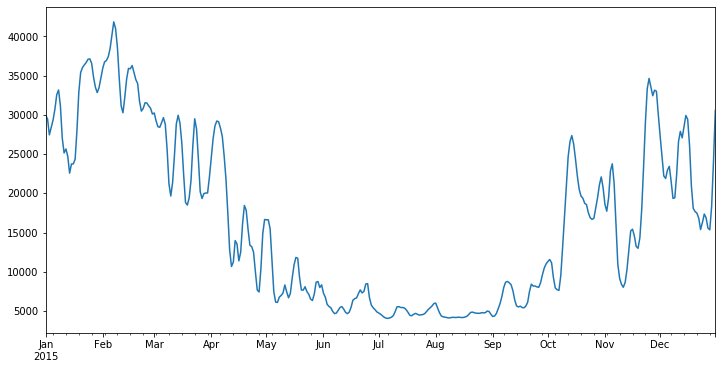

In [12]:
df_daily_gas_BE.sum(axis=1).plot(figsize=(12,6))

### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' gas demand per hour for a given `state` in **MWh**
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`
- Takes about **5-8 minutes** to run

In [9]:
df_gas_cts = temporal.disagg_temporal_gas_CTS('BE')
df_gas_cts.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,11000
2015-01-01 00:00:00,1087.700652
2015-01-01 01:00:00,1056.695462
2015-01-01 02:00:00,1020.850325
2015-01-01 03:00:00,1158.185359
2015-01-01 04:00:00,1467.587640


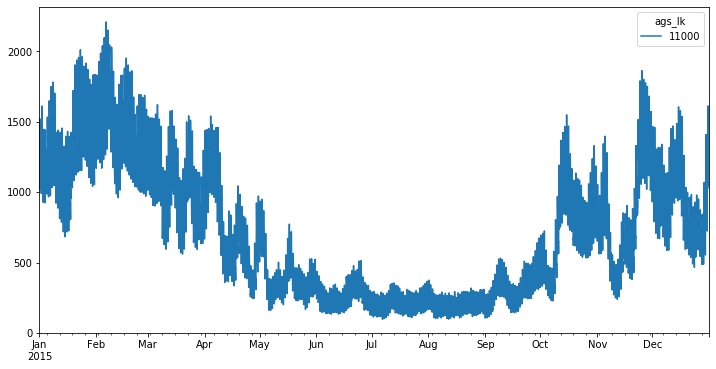

In [15]:
df_gas_cts.plot(figsize=(12,6), ylim = 0)

### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of industry *power* and *gas* demand per hour for all districts in **MWh**
- Uses temporal and spatial functions like `shift_profile_industry()`, `disagg_industry(source)` and information from `config.py`

In [2]:
df_pow_industry = temporal.disagg_temporal_industry(source='power') # source can be put to 'gas'
df_pow_industry.head()

Working on state: SH.
Working on state: HH.
Working on state: NI.
Working on state: HB.
Working on state: NW.
Working on state: HE.
Working on state: RP.
Working on state: BW.
Working on state: BY.
Working on state: SL.
Working on state: BE.
Working on state: BB.
Working on state: MV.
Working on state: SN.
Working on state: ST.
Working on state: TH.


,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00+01:00,2.172794,2.6326,4.283729,2.430802,24.178798,2.580783,1.414335,1.940935,7.542931,1.08628,...,4.735791,4.298181,6.941822,3.384061,7.304399,17.140225,4.025106,10.430391,3.79203,3.417297
2015-01-01 00:15:00+01:00,2.172794,2.6326,4.283729,2.430802,24.178798,2.580783,1.414335,1.940935,7.542931,1.08628,...,4.735791,4.298181,6.941822,3.384061,7.304399,17.140225,4.025106,10.430391,3.79203,3.417297
2015-01-01 00:30:00+01:00,2.172794,2.6326,4.283729,2.430802,24.178798,2.580783,1.414335,1.940935,7.542931,1.08628,...,4.735791,4.298181,6.941822,3.384061,7.304399,17.140225,4.025106,10.430391,3.79203,3.417297
2015-01-01 00:45:00+01:00,2.172794,2.6326,4.283729,2.430802,24.178798,2.580783,1.414335,1.940935,7.542931,1.08628,...,4.735791,4.298181,6.941822,3.384061,7.304399,17.140225,4.025106,10.430391,3.79203,3.417297
2015-01-01 01:00:00+01:00,2.172794,2.6326,4.283729,2.430802,24.178798,2.580783,1.414335,1.940935,7.542931,1.08628,...,4.735791,4.298181,6.941822,3.384061,7.304399,17.140225,4.025106,10.430391,3.79203,3.417297


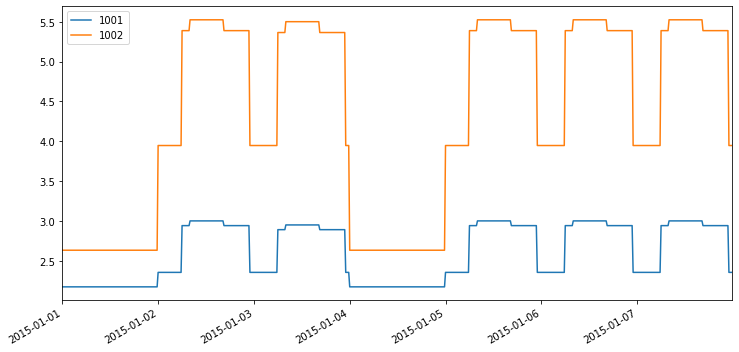

In [3]:
df_pow_industry.loc[:,['1001', '1002']].head(672).plot(figsize=(12,6))

### Function shift_load_profile_generator()
- calculates normalized shift load profiles for industry
- S1, S2, S3 meaning shifts from 8:00 to 16:30, 06:00 to 23:00 and continously respectively
- WT, WT_SA, and WT_SA_SO meaning working on weekdays only (holidays excluded), weekdays + saturdays (holidays excluded), all the time
- shift has 2 levels, with the lower level being 35% of the higher level

In [10]:
df_workshift = data.shift_load_profile_generator('BE')

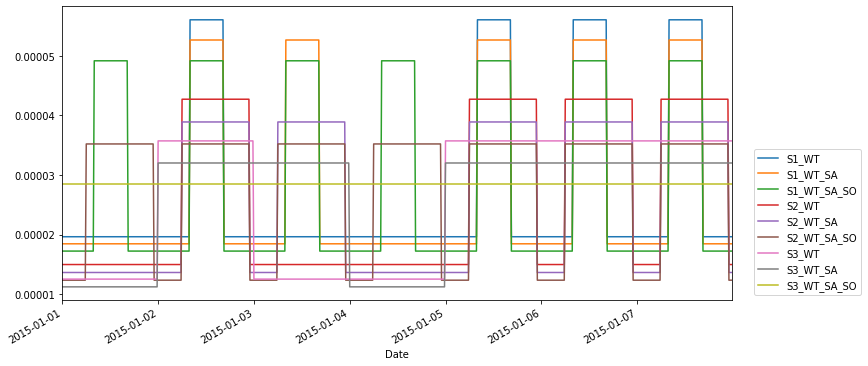

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

df_workshift.head(672).plot(ax=ax)
ax.legend(loc=4, bbox_to_anchor=(1.2,0))

### Function CTS_power_slp_generator()
-  returns the electric standard load profiles in normalized units ('normalized' means here that the sum over all time steps equals one)
- takes information from `./data_in/Power Load Profiles/`

In [9]:
df_power_slp = data.CTS_power_slp_generator('BE')

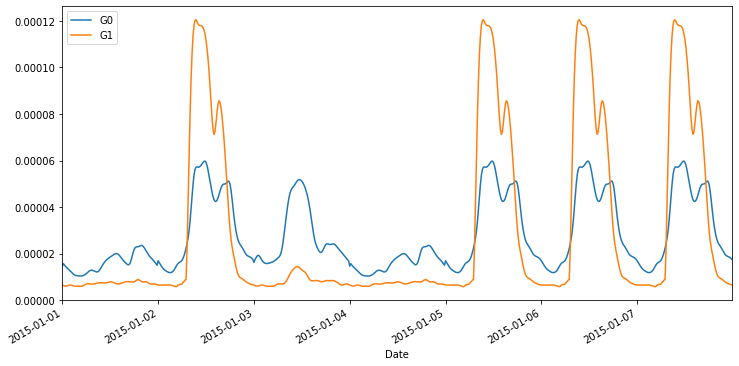

In [10]:
df_power_slp[['G0', 'G1']].head(672).plot(figsize=(12,6), ylim = 0)

In [11]:
df_power_slp

,Tag,Stunde,DayOfYear,WT,SA,SO,WIZ,SOZ,UEZ,H0,L0,L1,L2,G0,G1,G2,G3,G4,G5,G6
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,2015-01-01,00:00:00,1,False,False,True,True,False,False,0.000018,0.000018,0.000017,0.000019,0.000015,0.000007,0.000017,0.000021,0.000014,0.000009,0.000017
2015-01-01 00:15:00+01:00,2015-01-01,00:15:00,1,False,False,True,True,False,False,0.000022,0.000017,0.000016,0.000017,0.000016,0.000006,0.000018,0.000022,0.000014,0.000010,0.000025
2015-01-01 00:30:00+01:00,2015-01-01,00:30:00,1,False,False,True,True,False,False,0.000020,0.000016,0.000016,0.000017,0.000015,0.000006,0.000017,0.000022,0.000014,0.000010,0.000023
2015-01-01 00:45:00+01:00,2015-01-01,00:45:00,1,False,False,True,True,False,False,0.000019,0.000016,0.000015,0.000016,0.000015,0.000006,0.000016,0.000022,0.000014,0.000009,0.000021
2015-01-01 01:00:00+01:00,2015-01-01,01:00:00,1,False,False,True,True,False,False,0.000017,0.000016,0.000015,0.000016,0.000014,0.000006,0.000015,0.000022,0.000013,0.000010,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:45:00+01:00,2015-12-31,22:45:00,365,False,True,False,True,False,False,0.000030,0.000023,0.000020,0.000025,0.000019,0.000007,0.000029,0.000023,0.000015,0.000010,0.000044
2015-12-31 23:00:00+01:00,2015-12-31,23:00:00,365,False,True,False,True,False,False,0.000030,0.000022,0.000020,0.000023,0.000018,0.000007,0.000026,0.000023,0.000015,0.000010,0.000040
2015-12-31 23:15:00+01:00,2015-12-31,23:15:00,365,False,True,False,True,False,False,0.000028,0.000021,0.000019,0.000022,0.000018,0.000007,0.000023,0.000022,0.000015,0.000010,0.000037


### Function gas_slp_weekday_params()
- returns the weekday-parameters ("Wochentagsfaktoren") of the gas standard load profiles (SLP) per State and SLP-Type in normalized units for later use in gas SLP

In [36]:
df_gas_slp = data.gas_slp_weekday_params('BE')

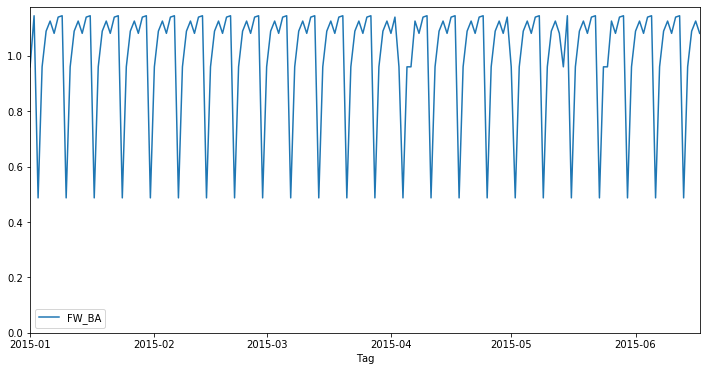

In [37]:
df_gas_slp[['FW_BA']].head(168).plot(figsize=(12,6), ylim = 0)

# Auxiliary Functions

### Function efficiency_enhancement()
- Read and return the efficienicy enhancement for power or gas consumption for the current *base year* relative to 2015 per branch. 2015 is the benchmark because specific consumption is based on data from this year.

In [17]:
df = data.efficiency_enhancement('power')

In [18]:
df

WZ
1     1
2     1
3     1
5     1
6     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Effizienzsteigerungsrate Strom, Length: 88, dtype: int64

## Function t_allo()
- returns the daily allocation temperature for each NUTS-3 district (401 NUTS-3 districts in Germany)
- t_allo is calculated according to the publication of BDEW on Gas SLPs, p. 22


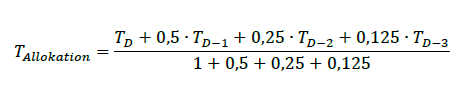

 
!Line 204 --> Temperatur aus zwei Landkreisen zusammengelegt


In [7]:
df_t_allo = data.t_allo()
df_t_allo.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,1001,1002,1003,1004,1051,1053,9774,1054,1055,1056,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00+01:00,4.846667,3.386667,2.443333,2.976667,3.960000,2.133333,-1.713333,5.140000,2.370000,2.473333,...,2.166667,0.000000,0.183333,1.586667,0.163333,1.223333,0.466667,0.960000,0.880000,1.003333
2015-01-02 00:00:00+01:00,5.768980,5.064014,4.500544,4.950204,5.335918,4.378571,-3.273061,6.098095,4.485442,4.642313,...,2.270408,-0.052721,-1.472449,1.651429,-1.357211,1.178027,0.902381,0.744082,0.752653,1.369116
2015-01-03 00:00:00+01:00,5.804445,5.265073,4.791282,5.188426,5.744036,4.738095,-1.168857,6.325832,4.771270,4.904902,...,2.575482,0.247927,-1.319332,2.087247,-1.349501,1.546128,1.402642,1.080165,1.217804,1.949469
2015-01-04 00:00:00+01:00,5.126411,4.549156,4.080490,4.507839,5.210513,4.188763,-0.824925,5.840115,4.098049,4.424334,...,2.485728,0.269494,-1.262638,1.930961,-1.297350,1.491930,1.266486,0.980766,1.177418,1.799501
2015-01-05 00:00:00+01:00,4.562905,4.086507,3.618178,3.990390,4.976216,3.786529,-0.693200,5.565019,3.668190,4.110900,...,2.396788,0.290311,-1.546013,1.873229,-1.623932,1.477079,1.305384,0.962028,1.274715,1.840803


## Function h_value()
- returns a DataFrame with normalized h-values for a given district and gas load profile. normalization is necessary for later use as disaggregation parameter from yearly to daily gas consumption, but can also be turned off
- h-values depend on the allocation temperature and determine the daily gas consumption

In [111]:
from disaggregator import config, data, spatial, temporal
df_h_value = data.h_value(slp = 'KO', districts = ['11000'])
df_h_value.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,11000
2015-01-01 00:00:00+01:00,0.005148
2015-01-02 00:00:00+01:00,0.005072
2015-01-03 00:00:00+01:00,0.004716
2015-01-04 00:00:00+01:00,0.004881
2015-01-05 00:00:00+01:00,0.005046


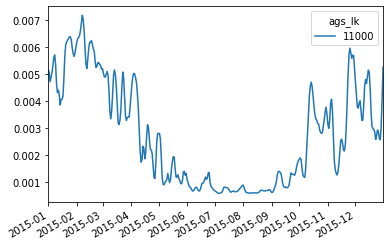

In [112]:
df_h_value.plot()